In [1]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from help_func import plot, draw_lines_from_points

In [2]:
# read pickled data
pickled_data = pickle.load(open("pickled_calib_data.p", "rb"))
mtx = pickled_data["mtx"]
dist_coeff = pickled_data["dist_coeff"]

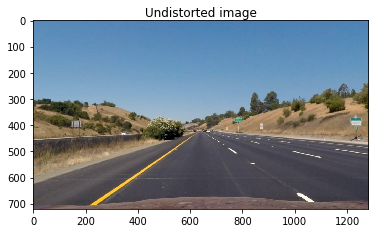

In [3]:
raw_img = mpimg.imread('test_images/straight_lines1.jpg')
img_size = (raw_img.shape[1], raw_img.shape[0])

undist_img = cv2.undistort(raw_img, mtx, dist_coeff)

# for zooming in
# %matplotlib notebook
%matplotlib inline
plt.figure()
plt.imshow(undist_img)
plt.title('Undistorted image')

In [4]:
# source points manually chosen from loaded picture
src_pts = np.array([[580, 460], 
                    [700, 460], 
                    [1100, img_size[1]], 
                    [200, img_size[1]]],
                   np.float32).reshape((4, 1, 2))

In [5]:
# destination points for perspective transformation
lane_dist = 700 # in pixels
mid_pnt = img_size[0]//2
dst_pts = np.array([[mid_pnt - lane_dist/2, 0], 
                    [mid_pnt + lane_dist/2, 0], 
                    [mid_pnt + lane_dist/2, img_size[1]],
                    [mid_pnt - lane_dist/2, img_size[1]]], 
                   np.float32).reshape((4, 1, 2))

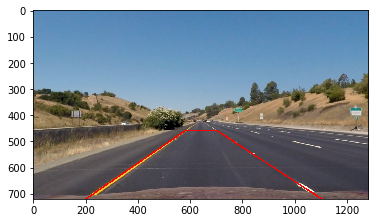

In [8]:
undist_img_cp = np.copy(undist_img)
draw_lines_from_points(undist_img_cp, src_pts)
plot(undist_img_cp)

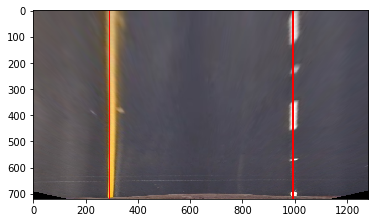

In [10]:
# perspective transform
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
warped_img = cv2.warpPerspective(undist_img, M, 
                                 img_size, flags=cv2.INTER_LINEAR)

draw_lines_from_points(warped_img, dst_pts)
plot(warped_img)